In [1]:
import numpy as np

X = np.array([[0, 0, 1],
             [0, 1, 1],
             [1, 0, 1],
             [1, 1, 1]])

D = np.array([[0], [0], [0], [1]])

In [2]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [3]:
def calc_output(W,x):
    v = np.matmul(W, x)
    y = sigmoid(v)

    return y

In [4]:
def calc_error(d,y):
    e = d - y
    delta = y*(1-y)*e

    return delta

In [7]:
def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y = calc_output(W,x)
        delta = calc_error(d,y)

        dW = alpha*delta*x
        W = W + dW
    return W, delta

In [9]:
W = 2*np.random.random((1,3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)
    hist_loss.append(delta)
    hist_W.append(W)

    if epoch % 100 == 0:
        print(W)


[[ 0.22270561  0.13196009 -0.35526425]]
[[ 2.64904721  2.61349929 -4.00822901]]
[[ 3.46828497  3.44924418 -5.26292492]]
[[ 3.95996612  3.94727151 -6.0105794 ]]
[[ 4.30750461  4.29806815 -6.5369328 ]]
[[ 4.57483811  4.56736238 -6.94084997]]
[[ 4.79139059  4.78521698 -7.26753423]]
[[ 4.97302918  4.96778008 -7.54125273]]
[[ 5.12924825  5.12468802 -7.77647967]]
[[ 5.26616403  5.26213611 -7.98251702]]


<function matplotlib.pyplot.show(close=None, block=None)>

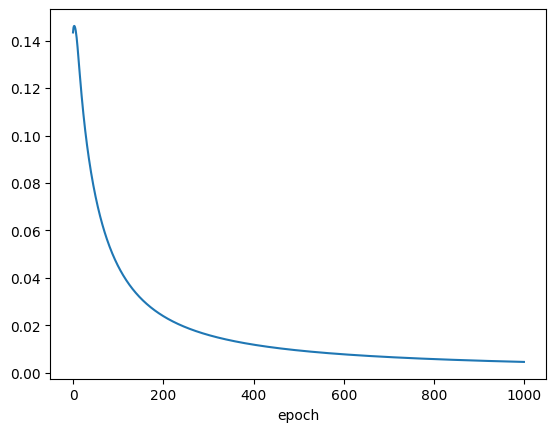

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show

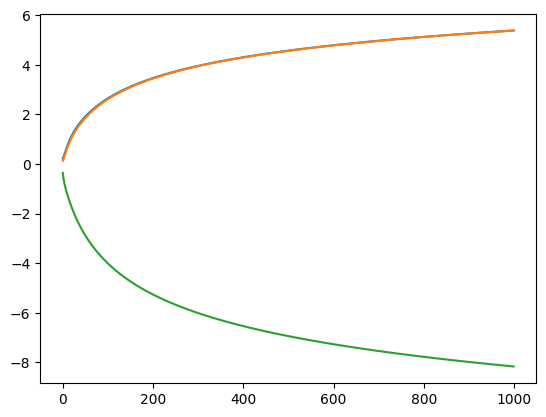

In [11]:
plt.plot(np.array(hist_W).reshape(-1,3));

In [12]:
N = 4

for k in range(N):
    x = X[k, :].T
    y = calc_output(W,x)

    print(y) 

[0.00028465]
[0.05837207]
[0.05857072]
[0.93124763]


In [2]:
import tensorflow as tf

tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2024-05-09 16:37:34.479425: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 16:37:34.479917: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 16:37:34.480227: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17235262305989095173
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4961009664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6739768214986354285
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [1]:
import tensorflow as tf

# GPU를 사용할 수 있는지 여부를 확인합니다.
if tf.config.list_physical_devices('GPU'):
    print('GPU 사용 가능')
else:
    print('GPU 사용 불가능')


2024-05-09 16:36:05.450620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 16:36:06.358106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU 사용 가능


2024-05-09 16:36:07.425758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 16:36:07.453204: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 16:36:07.453489: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-